# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Temperature Dataset

In [2]:
temp = pd.read_csv("Temperature_change_Data.csv", sep = ',')

# Explore Temp Data

In [3]:
temp.head()

,Country Code,Country Name,year,tem_change
0,AFG,Afghanistan,1961,-0.080
1,ALB,Albania,1961,0.631
2,DZA,Algeria,1961,0.186
3,ASM,American Samoa,1961,-0.014
4,AND,Andorra,1961,0.749


In [4]:
temp.shape

(16756, 4)

## Check null values

In [5]:
temp.isnull().sum()

Country Code    2714
Country Name       0
year               0
tem_change      1781
dtype: int64

In [6]:
temp["Country Name"].value_counts()

Singapore                                       59
New Zealand                                     59
American Samoa                                  59
World                                           59
Paraguay                                        59
                                                ..
Nepal                                           59
Tonga                                           59
Zambia                                          59
Saint Helena, Ascension and Tristan da Cunha    59
Niue                                            59
Name: Country Name, Length: 284, dtype: int64

## Show number of unique values

In [7]:
temp["Country Name"].nunique()

284

In [8]:
temp["Country Code"].nunique()

238

In [9]:
temp["year"].nunique()

59

## Drop Country code column
* 2714 null values and not needed because we have 'Country Name' Column
* Consider as redundant column

In [10]:
temp.drop('Country Code',axis = 1, inplace = True)

In [11]:
temp.head()

,Country Name,year,tem_change
0,Afghanistan,1961,-0.080
1,Albania,1961,0.631
2,Algeria,1961,0.186
3,American Samoa,1961,-0.014
4,Andorra,1961,0.749


## Check duplicates

In [12]:
temp.duplicated().sum()

0

# Visualization

<AxesSubplot:xlabel='year', ylabel='tem_change'>

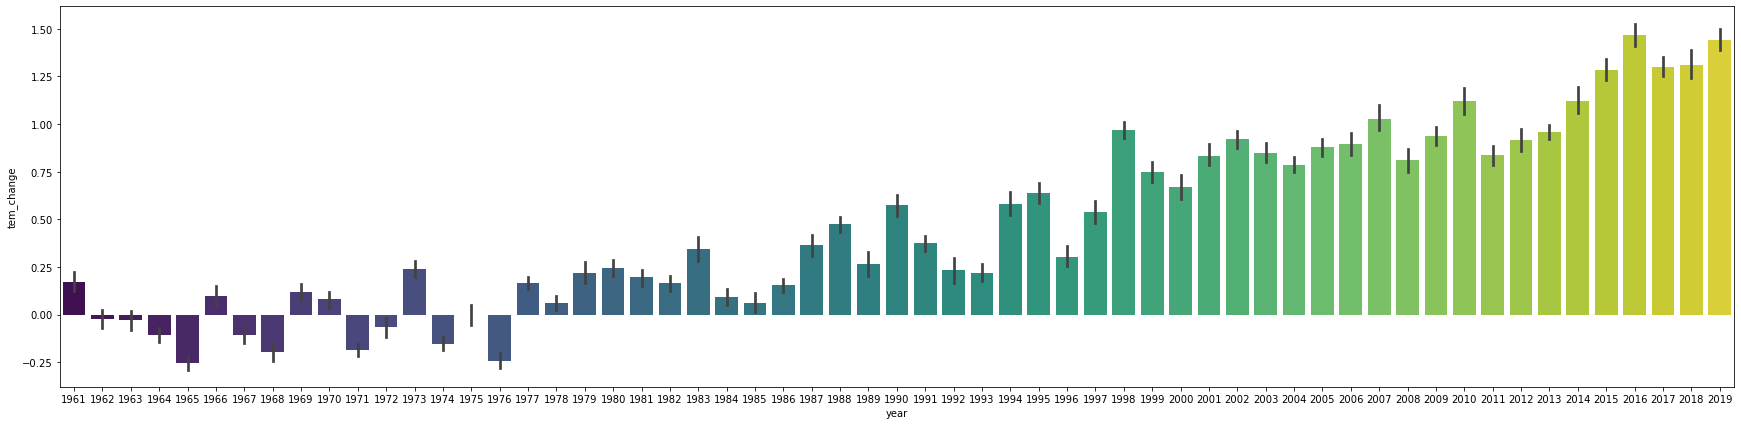

In [13]:
plt.figure(figsize = (30,7))
sns.barplot(data=temp, x=temp.year , y = temp.tem_change, palette="viridis")

* In recent 25 years, the temperature increases too much.Specially in 2016,2019.

C:\Users\User\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


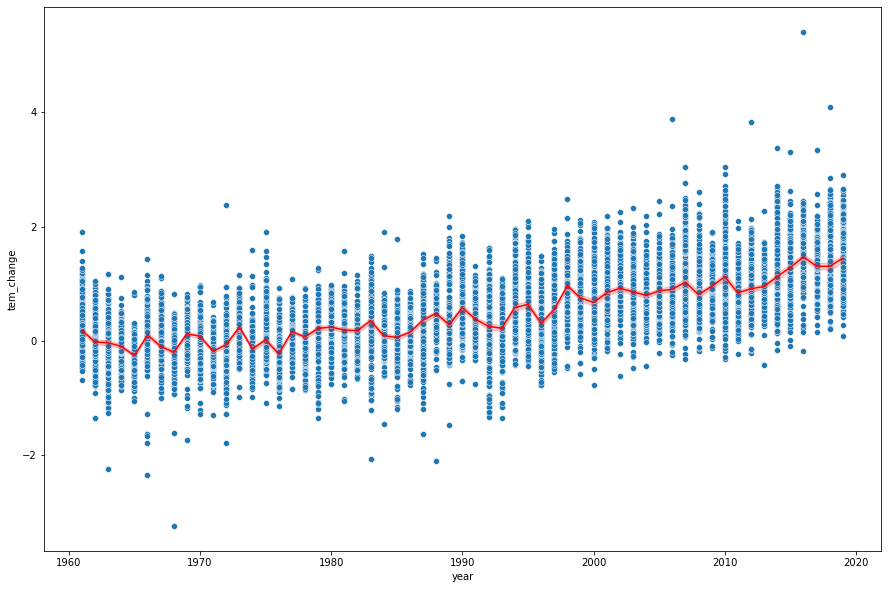

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(temp.year , y = temp.tem_change) 
sns.lineplot(temp.year , y = temp.tem_change, color="r", markers=True, dashes=False)

plt.show()

There are some outliers those might be:
* the countries in equator 
* increase factories in those countries.

In [15]:
top_10 = temp.groupby('Country Name').sum().sort_values('tem_change', ascending=False)[:10].reset_index()['Country Name']
bottom_10 = temp.groupby('Country Name').sum().sort_values('tem_change', ascending=True)[:10].reset_index()['Country Name']

In [16]:
top_10

0                          Mongolia
1    Svalbard and Jan Mayen Islands
2                            Gambia
3                           Morocco
4                     Guinea-Bissau
5                           Tunisia
6                        Mauritania
7                    Eastern Europe
8                           Austria
9                           Senegal
Name: Country Name, dtype: object

In [17]:
bottom_10

0                              Nauru
1                   Pitcairn Islands
2        Falkland Islands (Malvinas)
3                      Midway Island
4    Pacific Islands Trust Territory
5                       Yugoslav SFR
6                   Marshall Islands
7                          Singapore
8                              Yemen
9                               Niue
Name: Country Name, dtype: object

## Visualization for top country

In [18]:
mong_df = temp.loc[temp["Country Name"]=='Mongolia']

In [19]:
mong_df.head()

,Country Name,year,tem_change
143,Mongolia,1961,0.173
427,Mongolia,1962,-0.104
711,Mongolia,1963,1.174
995,Mongolia,1964,-0.188
1279,Mongolia,1965,0.856


<AxesSubplot:xlabel='year', ylabel='tem_change'>

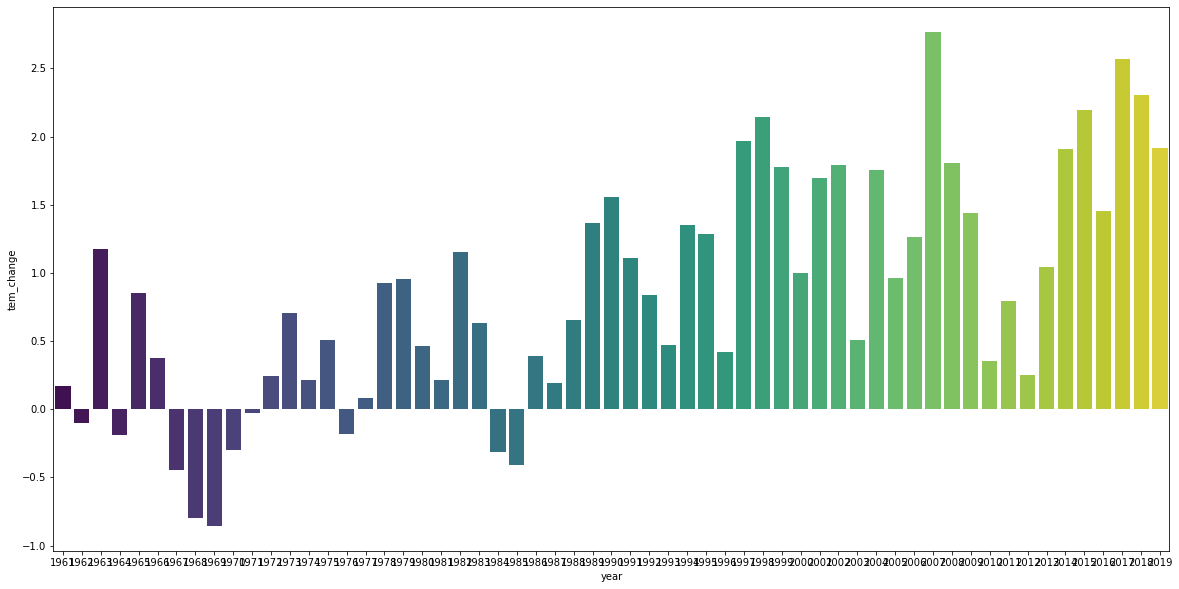

In [20]:
plt.figure(figsize = (20,10))
sns.barplot(data=mong_df, x=mong_df.year , y = mong_df.tem_change, palette="viridis")

<AxesSubplot:xlabel='year', ylabel='tem_change'>

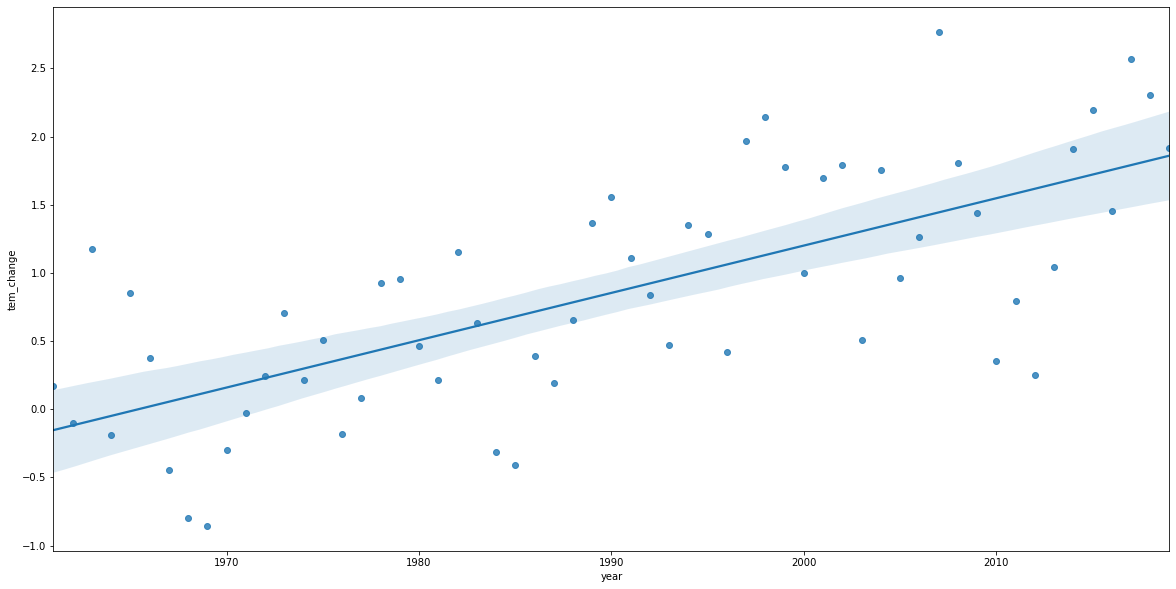

In [21]:
plt.figure(figsize = (20,10))
sns.regplot(data=mong_df, x=mong_df.year , y = mong_df.tem_change)

## Visualization for bottom country

In [22]:
niue_df = temp.loc[temp["Country Name"]=='Niue']

In [23]:
niue_df.head()

,Country Name,year,tem_change
159,Niue,1961,0.245
443,Niue,1962,-0.331
727,Niue,1963,-0.442
1011,Niue,1964,0.109
1295,Niue,1965,-0.508


<AxesSubplot:xlabel='year', ylabel='tem_change'>

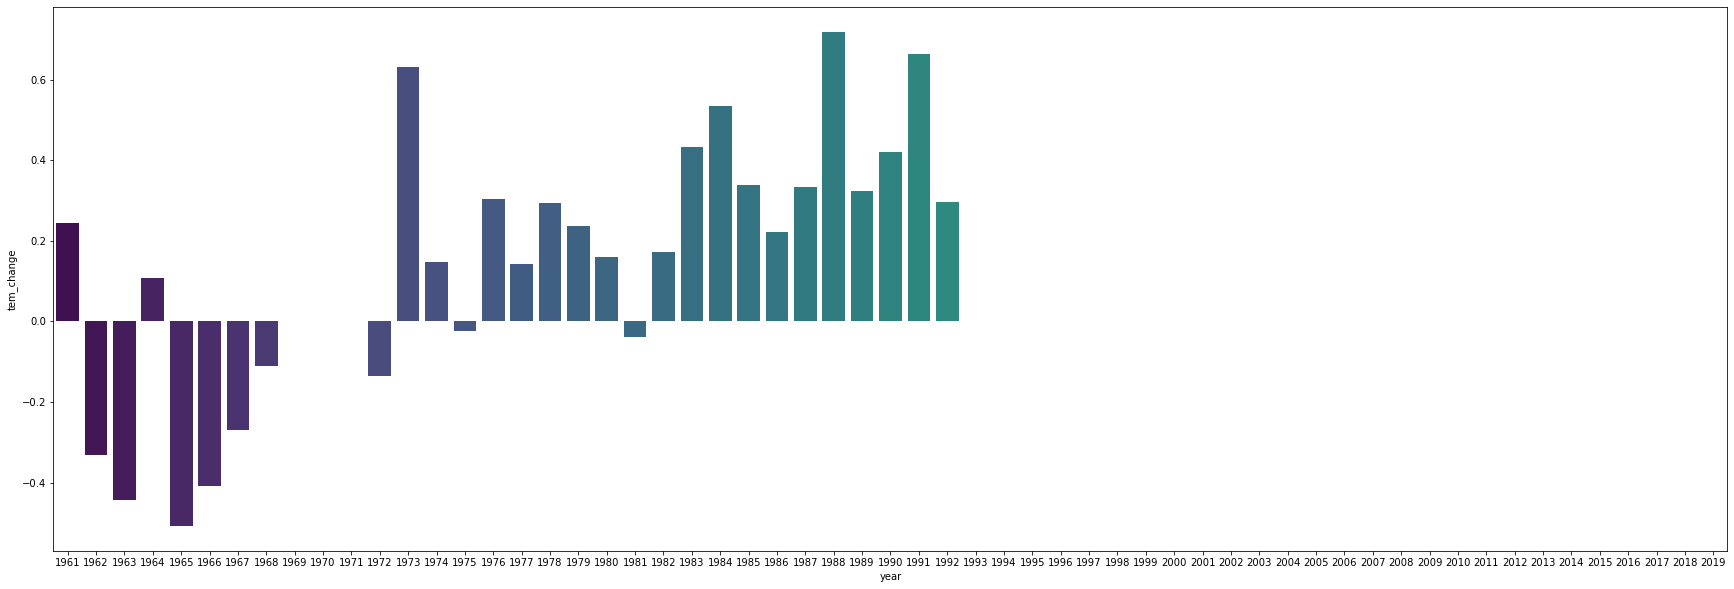

In [24]:
plt.figure(figsize = (30,10))
sns.barplot(data=niue_df, x=niue_df.year , y = niue_df.tem_change, palette="viridis")

<AxesSubplot:xlabel='year', ylabel='tem_change'>

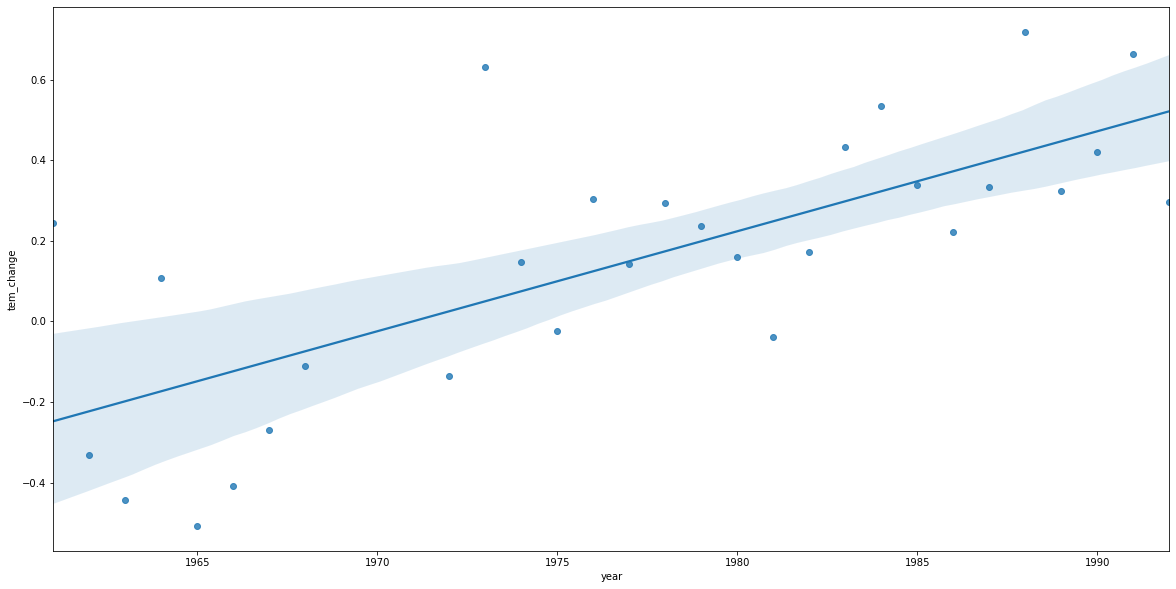

In [25]:
plt.figure(figsize = (20,10))
sns.regplot(data=niue_df, x=niue_df.year , y = niue_df.tem_change)

In [26]:
na_df = temp.loc[temp["Country Name"]=='Nauru']

In [27]:
na_df.head()

,Country Name,year,tem_change
150,Nauru,1961,-0.368
434,Nauru,1962,NaN
718,Nauru,1963,NaN
1002,Nauru,1964,NaN
1286,Nauru,1965,NaN


<AxesSubplot:xlabel='year', ylabel='tem_change'>

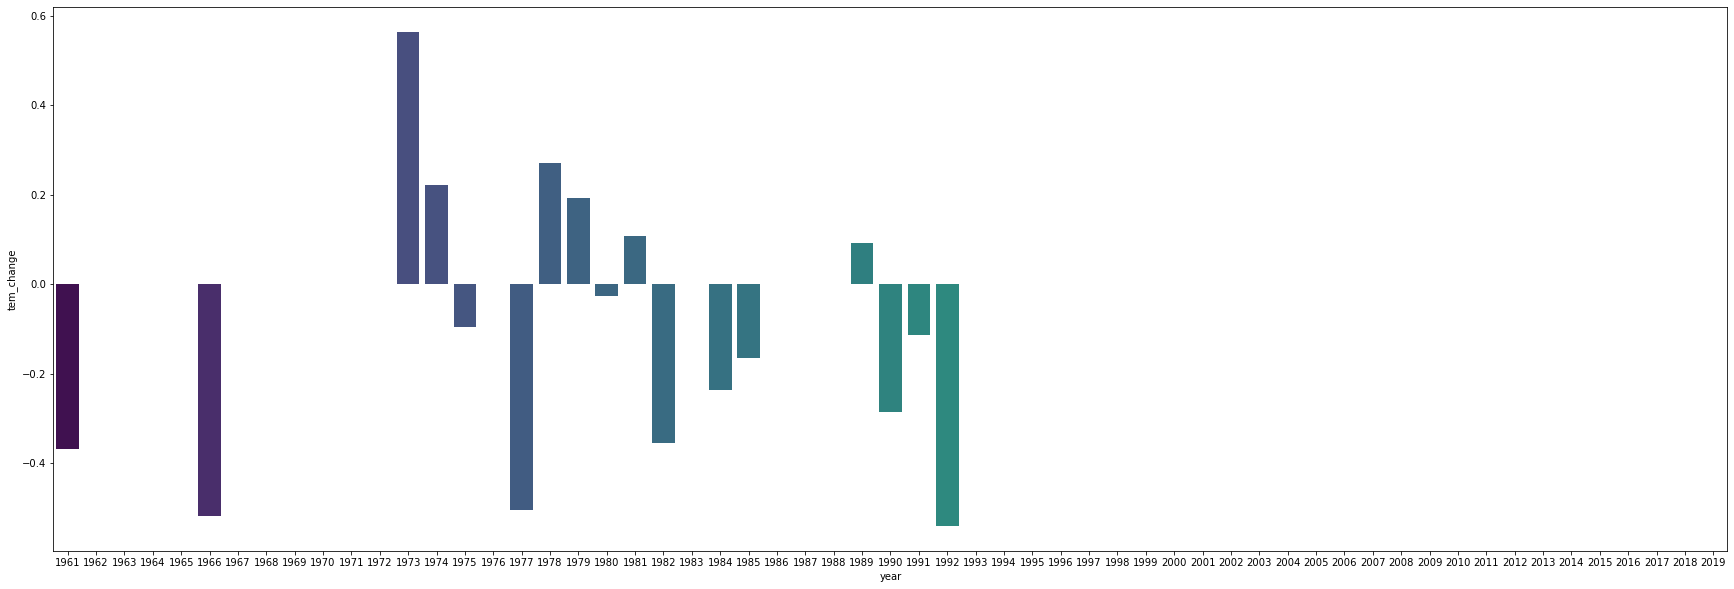

In [28]:
plt.figure(figsize = (30,10))
sns.barplot(data=na_df, x=na_df.year , y = na_df.tem_change, palette="viridis")

<AxesSubplot:xlabel='year', ylabel='tem_change'>

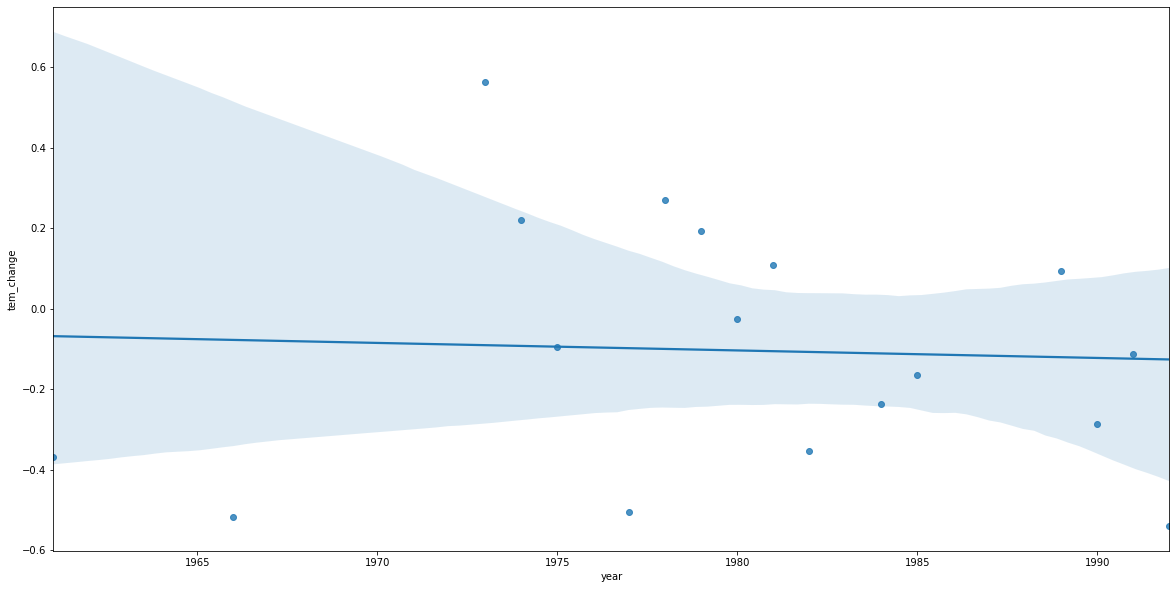

In [29]:
plt.figure(figsize = (20,10))
sns.regplot(data=na_df, x=na_df.year , y = na_df.tem_change)

In [30]:
p_df = temp.loc[temp["Country Name"]=='Pacific Islands Trust Territory']

In [31]:
p_df.head()

,Country Name,year,tem_change
164,Pacific Islands Trust Territory,1961,0.025
448,Pacific Islands Trust Territory,1962,0.020
732,Pacific Islands Trust Territory,1963,0.118
1016,Pacific Islands Trust Territory,1964,-0.075
1300,Pacific Islands Trust Territory,1965,-0.207


<AxesSubplot:xlabel='year', ylabel='tem_change'>

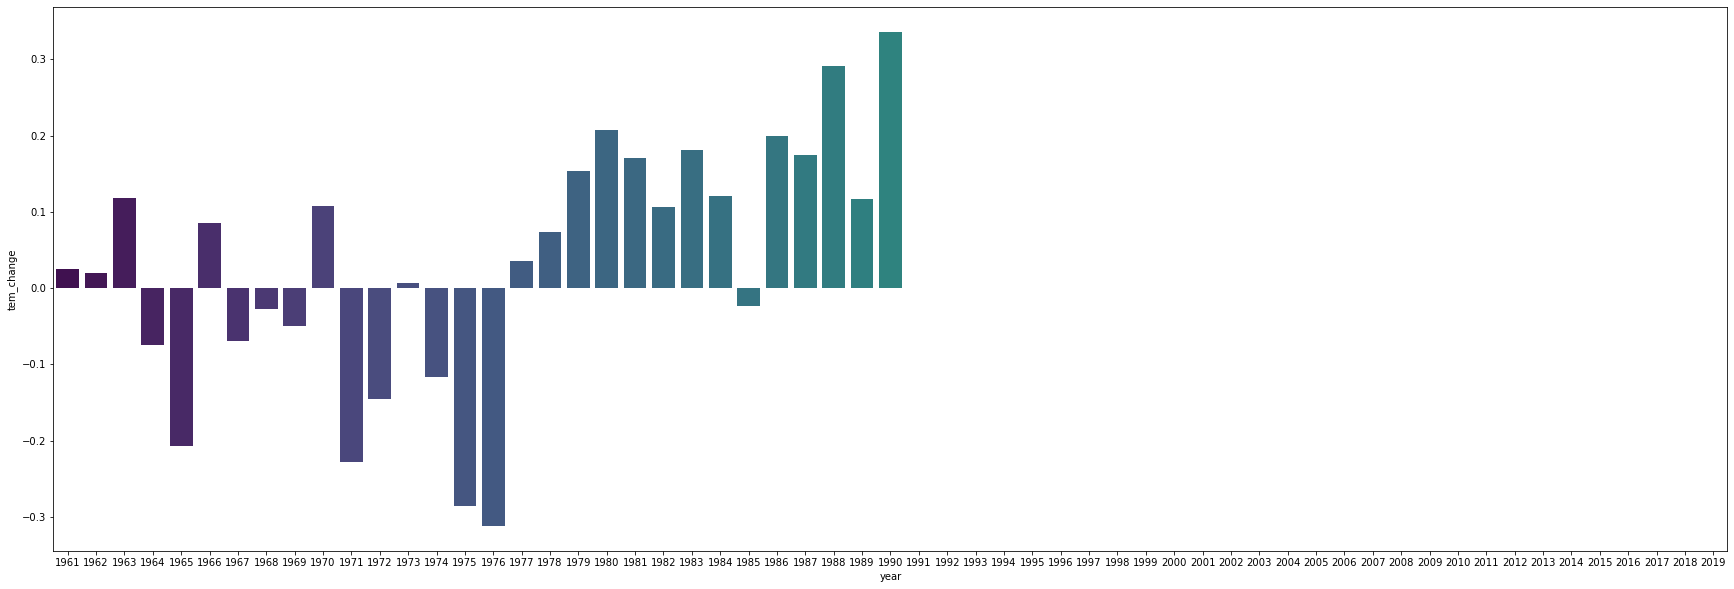

In [32]:
plt.figure(figsize = (30,10))
sns.barplot(data=p_df, x=p_df.year , y = p_df.tem_change, palette="viridis")

<AxesSubplot:xlabel='year', ylabel='tem_change'>

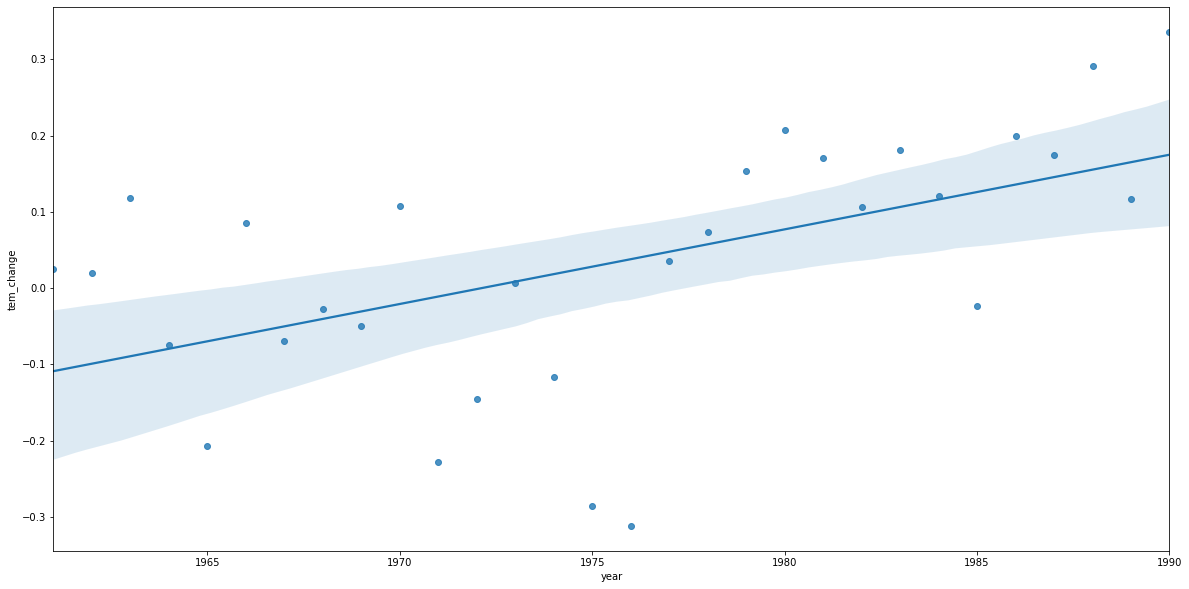

In [33]:
plt.figure(figsize = (20,10))
sns.regplot(data=p_df, x=p_df.year , y = p_df.tem_change)

* Most of bottom countries have null values so, that affect to the results

# Fill Null Values

<AxesSubplot:xlabel='Country Name', ylabel='tem_change'>

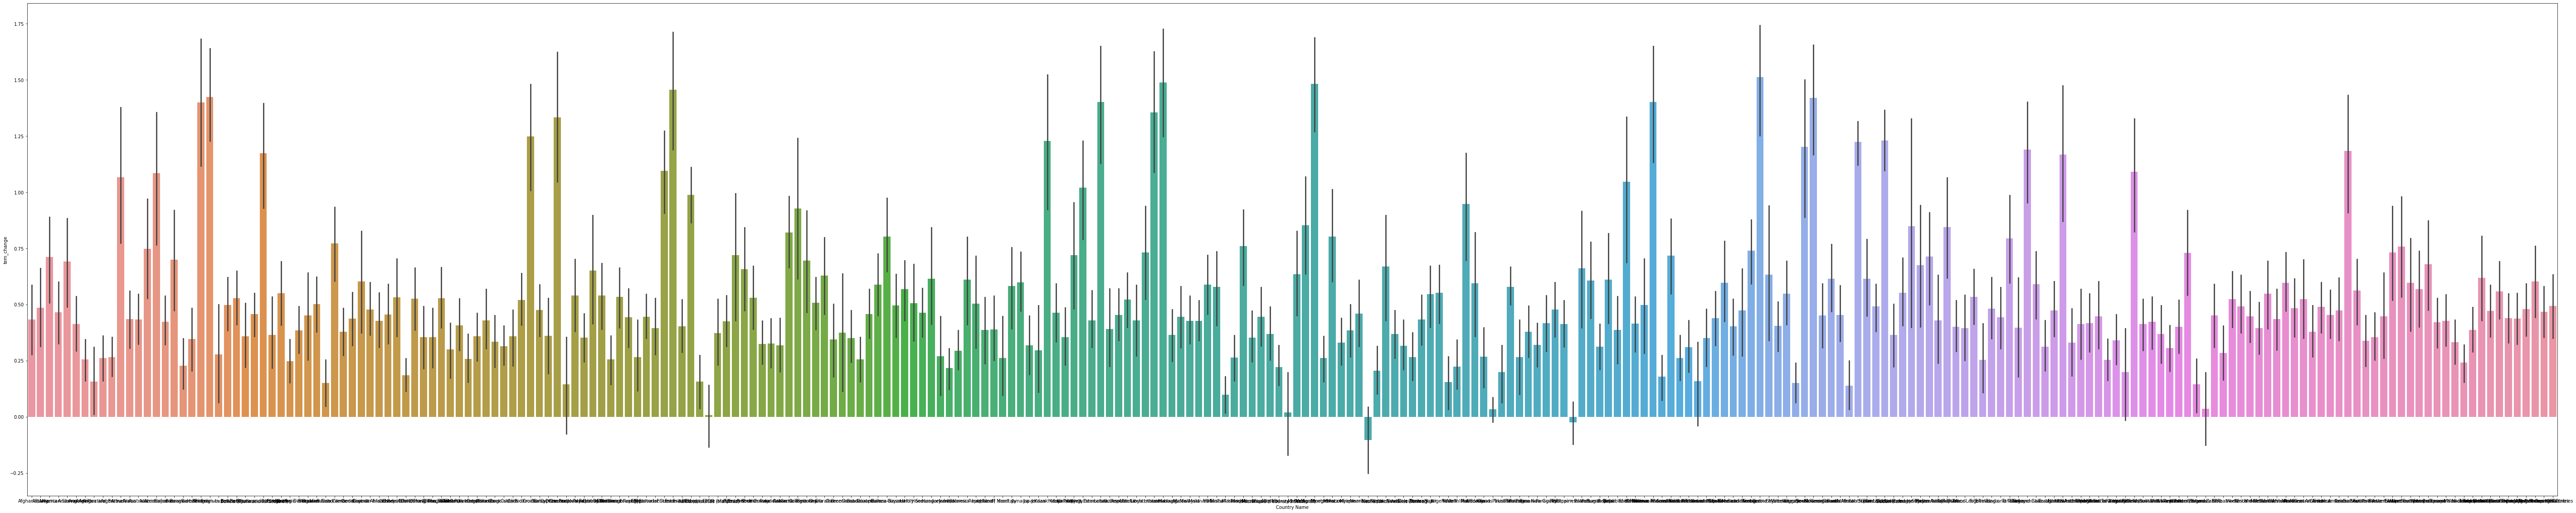

In [40]:
plt.figure(figsize = (100,20))

sns.barplot(x = temp["Country Name"], y = temp["tem_change"])

In [41]:
temp["tem_change"].fillna(method = "bfill", inplace = True)

<AxesSubplot:xlabel='Country Name', ylabel='tem_change'>

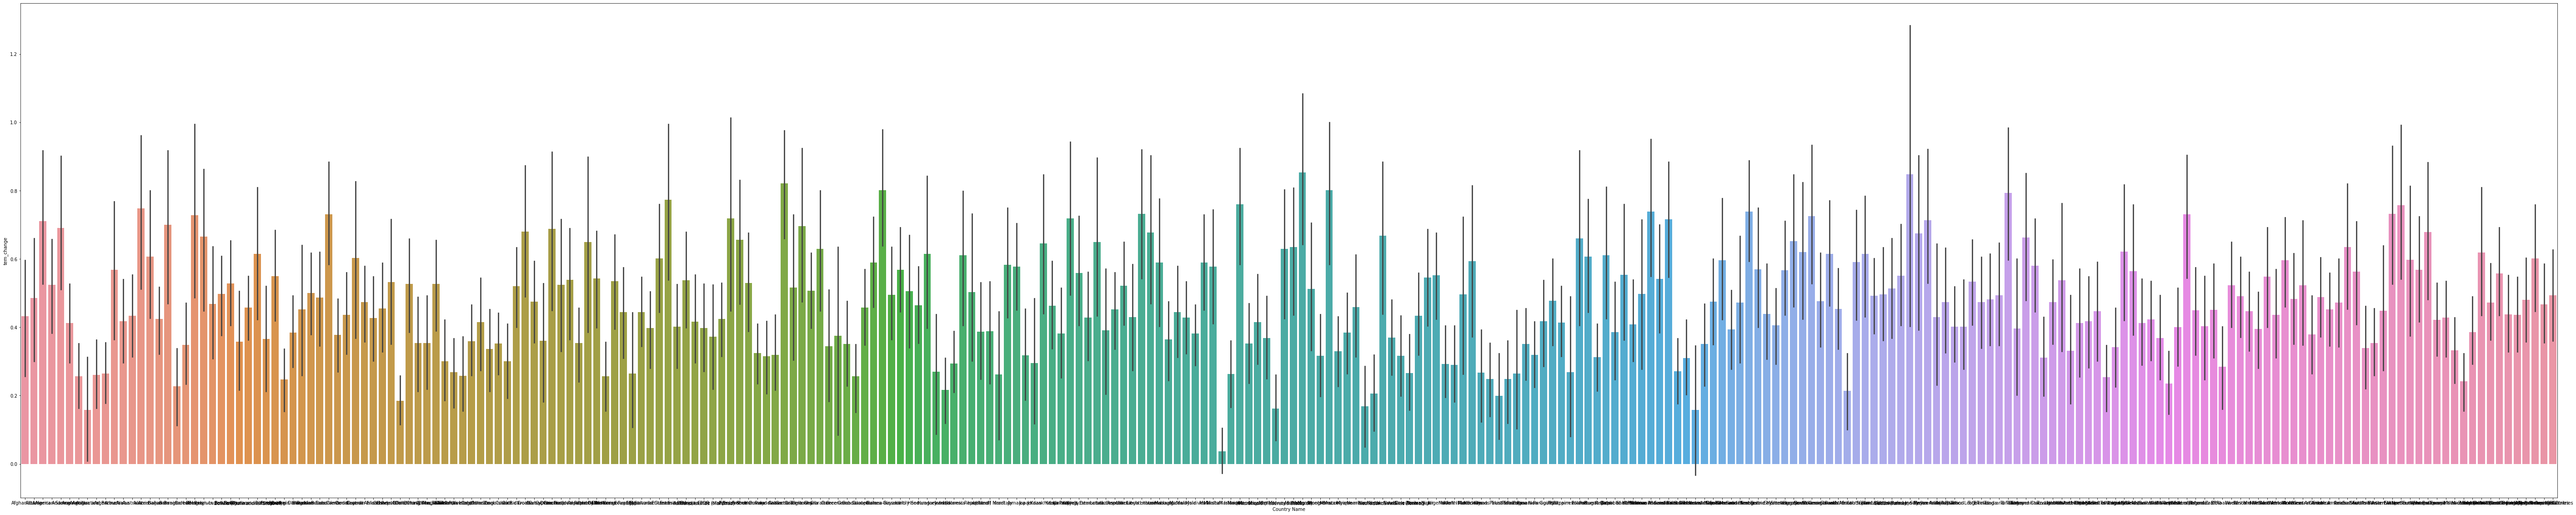

In [42]:
plt.figure(figsize = (100,20))

sns.barplot(x = temp["Country Name"], y = temp["tem_change"])

In [43]:
temp.isnull().sum()

Country Name    0
year            0
tem_change      0
dtype: int64

<Figure size 2880x1440 with 0 Axes>

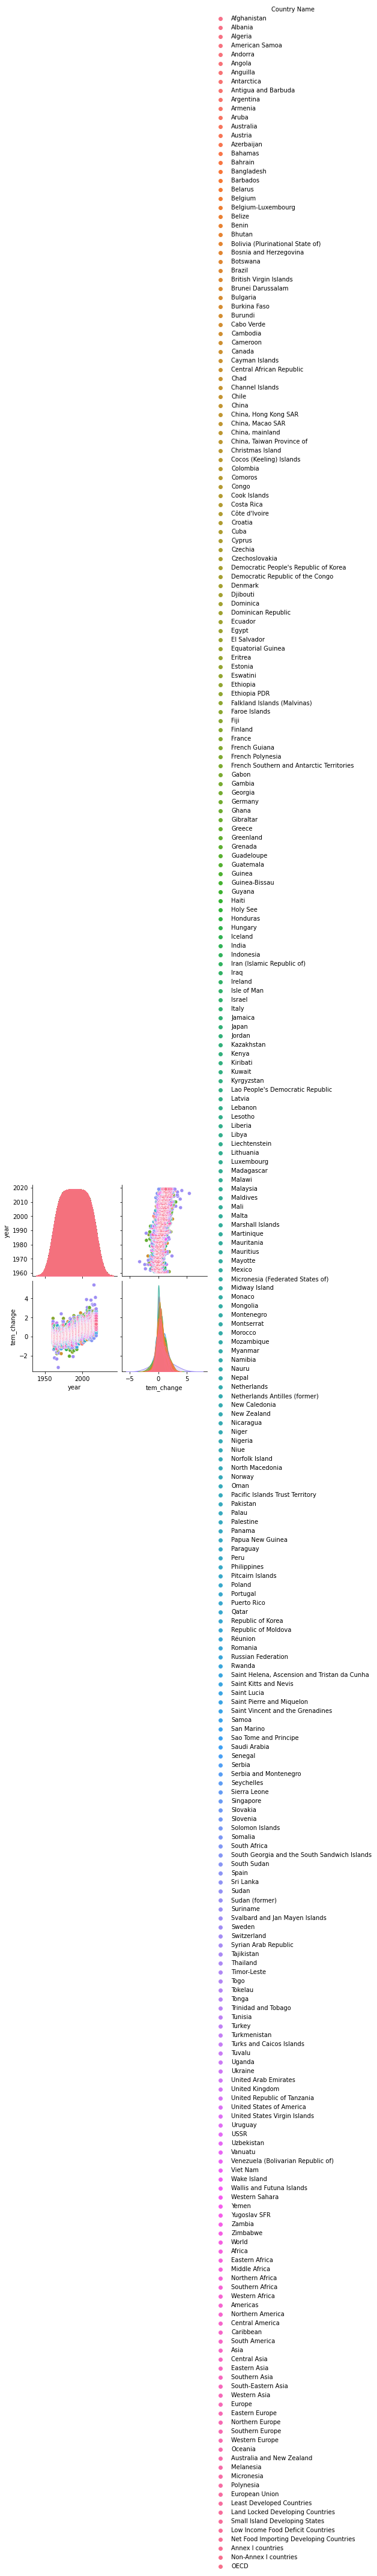

In [53]:
plt.figure(figsize = (40,20))
sns.pairplot(data = temp , hue = "Country Name" , palette = 'husl')